In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_excel('C:/Users/Anirudh MV/Downloads/EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = df.iloc[:,:1]

In [6]:
norm = MinMaxScaler()

In [7]:
norm.fit(data)

MinMaxScaler()

In [8]:
norm_data = norm.transform(data)
print(norm_data)

[[0.00000000e+00]
 [2.48756219e-04]
 [4.97512438e-04]
 ...
 [9.99502488e-01]
 [9.99751244e-01]
 [1.00000000e+00]]


In [9]:
type(norm_data)

numpy.ndarray

In [10]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [11]:
hier = linkage(norm_data, method="complete",metric="euclidean")

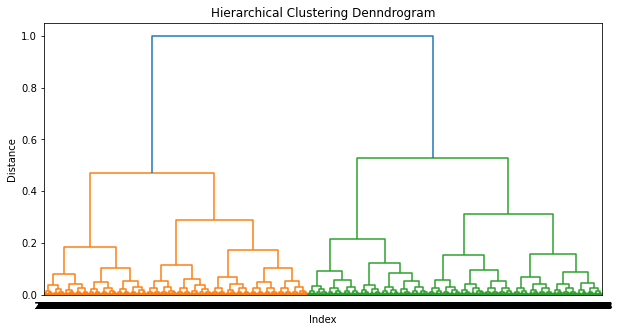

In [12]:
plt.figure(figsize=(10 , 5))
plt.title('Hierarchical Clustering Denndrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(hier,leaf_rotation=0.,leaf_font_size=8.)
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
h_comp = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(norm_data)

In [15]:
cluster_labels=pd.Series(h_comp.labels_)

In [16]:
data['clust']=cluster_labels

<ipython-input-16-178871cf5d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clust']=cluster_labels


In [17]:
cl1 = data.iloc[:,1:12].groupby(data.clust).median()
cl1

,clust
clust,
0,0
1,1
2,2
